# 🔬 Advanced Research Analysis & ML Prediction System

## COMPLETE SELF-CONTAINED ADVANCED LIPID ANALYSIS PIPELINE
# =========================================================


In [ ]:
#!pip install openpyxl

In [3]:
# COMPLETE SELF-CONTAINED ADVANCED LIPID ANALYSIS PIPELINE
# =========================================================

import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, AllChem, PandasTools
from rdkit import DataStructs
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib
import warnings

# BASE PIPELINE CLASS
class EnhancedLipidPipeline:
    """Complete enhanced lipid analysis pipeline with all four improvements"""
    
    def __init__(self, sdf_path):
        self.sdf_path = sdf_path
        self.df = None
        self.search_engine = None
        
    def run_complete_analysis(self, sample_size=None):
        """Run the complete enhanced analysis pipeline"""
        print("🚀 STARTING ENHANCED LIPID MAPS ANALYSIS")
        print("=" * 50)
        
        # 1. Load and preprocess data
        if not self._load_data(sample_size):
            return False
            
        # 2. Apply all enhancements
        self._apply_official_classification()
        self._validate_exact_mass()
        self._add_external_links()
        
        print("✅ ENHANCED PIPELINE READY!")
        self._print_summary()
        return True
    
    def _load_data(self, sample_size):
        """Load SDF data with error handling"""
        try:
            self.df = PandasTools.LoadSDF(self.sdf_path, 
                                        molColName='Molecule',
                                        smilesName='SMILES',
                                        strictParsing=False)
            
            if sample_size and sample_size < len(self.df):
                self.df = self.df.sample(sample_size, random_state=42)
                
            print(f"📥 Loaded {len(self.df)} lipid structures")
            
            # Calculate basic properties
            self._calculate_molecular_properties()
            return True
            
        except Exception as e:
            print(f"❌ Error loading data: {e}")
            return False
    
    def _calculate_molecular_properties(self):
        """Calculate basic molecular properties"""
        properties = {
            'Molecular_Weight': Descriptors.MolWt,
            'LogP': Descriptors.MolLogP,
            'TPSA': Descriptors.TPSA,
            'HBD': Descriptors.NumHDonors,
            'HBA': Descriptors.NumHAcceptors
        }
        
        for prop_name, prop_func in properties.items():
            self.df[prop_name] = self.df['Molecule'].apply(
                lambda x: prop_func(x) if x else None
            )
    
    def _apply_official_classification(self):
        """Apply official LIPID MAPS classification"""
        print("🏷️ Applying official classification...")
        
        # Look for LM_ID column
        if 'LM_ID' in self.df.columns:
            self.df['parsed_lm_id'] = self.df['LM_ID'].apply(self._parse_lm_id)
            
            # Extract classification components
            self.df['category_code'] = self.df['parsed_lm_id'].apply(
                lambda x: x.get('category_code') if x else None
            )
            self.df['class_code'] = self.df['parsed_lm_id'].apply(
                lambda x: x.get('class_code') if x else None
            )
            
            print(f"   Parsed {self.df['category_code'].notna().sum()} LM_IDs")
    
    def _parse_lm_id(self, lm_id):
        """Parse LIPID MAPS ID"""
        if not lm_id or not isinstance(lm_id, str) or not lm_id.startswith('LM'):
            return None
            
        try:
            return {
                'category_code': lm_id[2:4],
                'class_code': lm_id[4:6],
                'subclass_code': lm_id[6:8]
            }
        except:
            return None
    
    def _validate_exact_mass(self):
        """Validate exact mass accuracy"""
        if 'EXACT_MASS' not in self.df.columns:
            print("⚠️  No EXACT_MASS column found for validation")
            return
            
        print("⚖️ Validating exact masses...")
        
        validations = []
        for idx, row in self.df.iterrows():
            valid = self._validate_single_mass(row)
            validations.append(valid)
        
        validation_df = pd.DataFrame(validations)
        self.df['mass_valid'] = validation_df['valid']
        self.df['mass_discrepancy'] = validation_df['discrepancy']
        
        valid_count = validation_df['valid'].sum()
        print(f"   Mass validation: {valid_count}/{len(validation_df)} valid")
    
    def _validate_single_mass(self, row):
        """Validate mass for a single lipid"""
        try:
            reported = float(row['EXACT_MASS'])
            calculated = Descriptors.ExactMolWt(row['Molecule']) if row['Molecule'] else None
            
            if calculated is None:
                return {'valid': False, 'discrepancy': None}
                
            discrepancy = abs(reported - calculated)
            valid = discrepancy <= 0.01  # 0.01 Da tolerance
            
            return {'valid': valid, 'discrepancy': discrepancy}
            
        except:
            return {'valid': False, 'discrepancy': None}
    
    def _add_external_links(self):
        """Add external database links"""
        print("🔗 Adding external database links...")
        
        databases = {
            'PUBCHEM_CID': 'https://pubchem.ncbi.nlm.nih.gov/compound/{}',
            'HMDB_ID': 'https://hmdb.ca/metabolites/{}',
            'KEGG_ID': 'https://www.genome.jp/dbget-bin/www_bget?{}',
            'CHEBI_ID': 'https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI:{}'
        }
        
        for db_id, url_template in databases.items():
            if db_id in self.df.columns:
                link_col = f'{db_id}_LINK'
                self.df[link_col] = self.df[db_id].apply(
                    lambda x: url_template.format(x) if pd.notna(x) else None
                )
                
                available = self.df[link_col].notna().sum()
                print(f"   {db_id}: {available} links")
    
    def _print_summary(self):
        """Print pipeline summary"""
        print("\n📊 PIPELINE SUMMARY:")
        print(f"   Total lipids: {len(self.df):,}")
        
        if 'category_code' in self.df.columns:
            categories = self.df['category_code'].value_counts()
            print(f"   Lipid categories: {len(categories)}")
            
        if 'mass_valid' in self.df.columns:
            valid_pct = self.df['mass_valid'].mean() * 100
            print(f"   Valid masses: {valid_pct:.1f}%")
        
        link_cols = [col for col in self.df.columns if col.endswith('_LINK')]
        total_links = sum(self.df[col].notna().sum() for col in link_cols)
        print(f"   External links: {total_links}")

# RESEARCH ANALYZER CLASS
class LipidResearchAnalyzer:
    """Advanced research analysis for lipidomics data"""
    
    def __init__(self, lipid_pipeline):
        self.pipeline = lipid_pipeline
        self.df = lipid_pipeline.df
        self.analysis_results = {}
        
    def comprehensive_lipid_analysis(self):
        """Run comprehensive research-focused lipid analysis"""
        print("🔬 STARTING COMPREHENSIVE LIPID RESEARCH ANALYSIS")
        print("=" * 50)
        
        analyses = [
            self._analyze_lipid_class_distribution,
            self._analyze_chemical_space,
            self._analyze_property_correlations,
            self._analyze_lipid_class_characteristics,
            self._analyze_biosynthetic_families
        ]
        
        for analysis in analyses:
            try:
                analysis()
            except Exception as e:
                print(f"⚠️  Analysis {analysis.__name__} failed: {e}")
        
        self._generate_research_report()
        
    def _analyze_lipid_class_distribution(self):
        """Detailed analysis of lipid class distribution"""
        print("📊 Analyzing lipid class distribution...")
        
        if 'CATEGORY' in self.df.columns:
            # Main category distribution
            category_dist = self.df['CATEGORY'].value_counts()
            self.analysis_results['category_distribution'] = category_dist
            
            # Molecular property distribution by category
            category_stats = self.df.groupby('CATEGORY').agg({
                'Molecular_Weight': ['mean', 'std', 'min', 'max'],
                'LogP': ['mean', 'std', 'min', 'max'],
                'TPSA': ['mean', 'std']
            }).round(2)
            
            self.analysis_results['category_property_stats'] = category_stats
            
            print(f"   Found {len(category_dist)} lipid categories")
            for category, count in category_dist.head(10).items():
                print(f"   {category}: {count} lipids")
    
    def _analyze_chemical_space(self):
        """Analyze lipid chemical space using PCA"""
        print("🧪 Analyzing chemical space with PCA...")
        
        # Select numeric properties for PCA
        numeric_cols = ['Molecular_Weight', 'LogP', 'TPSA', 'HBD', 'HBA']
        available_numeric = [col for col in numeric_cols if col in self.df.columns]
        
        if len(available_numeric) >= 2:
            X = self.df[available_numeric].dropna()
            
            if len(X) > 10:  # Enough data for PCA
                # Standardize features
                scaler = StandardScaler()
                X_scaled = scaler.fit_transform(X)
                
                # Perform PCA
                pca = PCA(n_components=2)
                X_pca = pca.fit_transform(X_scaled)
                
                self.analysis_results['pca'] = {
                    'components': X_pca,
                    'explained_variance': pca.explained_variance_ratio_,
                    'features': available_numeric
                }
                
                print(f"   PCA explained variance: {pca.explained_variance_ratio_.sum():.2%}")
    
    def _analyze_property_correlations(self):
        """Analyze correlations between molecular properties"""
        print("📈 Analyzing property correlations...")
        
        numeric_cols = ['Molecular_Weight', 'LogP', 'TPSA', 'HBD', 'HBA']
        available_numeric = [col for col in numeric_cols if col in self.df.columns]
        
        if len(available_numeric) >= 2:
            correlation_matrix = self.df[available_numeric].corr()
            self.analysis_results['correlation_matrix'] = correlation_matrix
            
            # Find strong correlations (absolute value > 0.5)
            strong_correlations = []
            for i in range(len(available_numeric)):
                for j in range(i+1, len(available_numeric)):
                    corr = correlation_matrix.iloc[i, j]
                    if abs(corr) > 0.5:
                        strong_correlations.append({
                            'property1': available_numeric[i],
                            'property2': available_numeric[j],
                            'correlation': corr
                        })
            
            self.analysis_results['strong_correlations'] = strong_correlations
            
            if strong_correlations:
                print("   Strong correlations found:")
                for corr in strong_correlations[:5]:
                    print(f"   {corr['property1']} ↔ {corr['property2']}: {corr['correlation']:.3f}")
    
    def _analyze_lipid_class_characteristics(self):
        """Identify characteristic properties of each lipid class"""
        print("🎯 Analyzing lipid class characteristics...")
        
        if 'CATEGORY' in self.df.columns:
            characteristics = {}
            property_cols = ['Molecular_Weight', 'LogP', 'TPSA']
            available_props = [col for col in property_cols if col in self.df.columns]
            
            for category in self.df['CATEGORY'].unique():
                category_data = self.df[self.df['CATEGORY'] == category]
                
                char_data = {}
                for prop in available_props:
                    if prop in category_data.columns:
                        char_data[prop] = {
                            'mean': category_data[prop].mean(),
                            'std': category_data[prop].std(),
                            'range': (category_data[prop].min(), category_data[prop].max())
                        }
                
                # Identify most common properties
                if len(category_data) > 0:
                    characteristics[category] = char_data
            
            self.analysis_results['class_characteristics'] = characteristics
            
            print(f"   Analyzed characteristics for {len(characteristics)} lipid classes")
    
    def _analyze_biosynthetic_families(self):
        """Group lipids into biosynthetic families"""
        print("🧬 Analyzing biosynthetic families...")
        
        # Define biosynthetic relationships (simplified)
        biosynthetic_families = {
            'glycerolipid_family': ['GL', 'GP'],
            'sphingolipid_family': ['SP'],
            'sterol_family': ['ST'],
            'fatty_acid_family': ['FA'],
            'polyketide_family': ['PK']
        }
        
        if 'category_code' in self.df.columns:
            family_counts = {}
            for family, categories in biosynthetic_families.items():
                family_lipids = self.df[self.df['category_code'].isin(categories)]
                family_counts[family] = len(family_lipids)
            
            self.analysis_results['biosynthetic_families'] = family_counts
            
            print("   Biosynthetic family counts:")
            for family, count in family_counts.items():
                if count > 0:
                    print(f"   {family}: {count} lipids")
    
    def _generate_research_report(self):
        """Generate comprehensive research report"""
        print("\n📋 GENERATING RESEARCH ANALYSIS REPORT")
        print("=" * 40)
        
        report = {
            'total_lipids_analyzed': len(self.df),
            'lipid_categories': self.df['CATEGORY'].nunique() if 'CATEGORY' in self.df.columns else 0,
            'analysis_timestamp': pd.Timestamp.now().strftime("%Y-%m-%d %H:%M:%S")
        }
        
        # Add key findings
        if 'category_distribution' in self.analysis_results:
            top_category = self.analysis_results['category_distribution'].index[0]
            top_count = self.analysis_results['category_distribution'].iloc[0]
            report['most_abundant_category'] = f"{top_category} ({top_count} lipids)"
        
        if 'strong_correlations' in self.analysis_results:
            report['strong_correlations_found'] = len(self.analysis_results['strong_correlations'])
        
        if 'biosynthetic_families' in self.analysis_results:
            report['biosynthetic_families_analyzed'] = len(self.analysis_results['biosynthetic_families'])
        
        self.analysis_results['research_report'] = report
        
        # Print summary
        for key, value in report.items():
            print(f"   {key.replace('_', ' ').title()}: {value}")

# MACHINE LEARNING CLASS
class LipidMachineLearning:
    """Fixed machine learning for lipid classification"""
    
    def __init__(self, lipid_pipeline):
        self.pipeline = lipid_pipeline
        self.df = lipid_pipeline.df
        self.models = {}
        
    def prepare_ml_features(self, feature_type='descriptors'):
        """Prepare features for machine learning with support for multiple feature types.
    
        Args:
            feature_type (str): Type of features to generate. 
                                Options: 'descriptors', 'fingerprints', 'properties'
        """
        print("🛠️ Preparing ML features...")
    
        features = []
        feature_names = []
    
        if feature_type == 'descriptors':
            # Calculate a comprehensive set of molecular descriptors
            for mol in self.df['Molecule']:
                if mol:
                    # Calculate a broad set of descriptors
                    descs = []
                    names = []
                    # Heavy atom count
                    descs.append(mol.GetNumHeavyAtoms())
                    names.append('HeavyAtomCount')
                    # Hydrogen bond acceptors and donors
                    descs.append(Descriptors.NumHAcceptors(mol))
                    names.append('NumHAcceptors')
                    descs.append(Descriptors.NumHDonors(mol))
                    names.append('NumHDonors')
                    # Rotatable bonds
                    descs.append(Descriptors.NumRotatableBonds(mol))
                    names.append('NumRotatableBonds')
                    # Number of rings
                    descs.append(Descriptors.RingCount(mol))
                    names.append('RingCount')
                    # Additional useful descriptors
                    descs.append(Descriptors.MolLogP(mol))  # Although this is predicted, it can be a useful feature
                    names.append('RDKit_LogP')
                    descs.append(Descriptors.TPSA(mol))
                    names.append('TPSA')
                    descs.append(Descriptors.MolWt(mol))
                    names.append('MolWt')
                
                    features.append(descs)
                    if not feature_names:  # Set names only once
                        feature_names = names
                else:
                    # If molecule is invalid, append a list of NaNs
                    features.append([np.nan] * 8)  # Adjust based on number of descriptors
        
            print(f"   Prepared {len(feature_names)} molecular descriptors")
        
        elif feature_type == 'fingerprints':
            # Use Morgan fingerprints (ECFP-like)
            for mol in self.df['Molecule']:
                if mol:
                    # Generate Morgan fingerprint with radius 2 (equivalent to ECFP4)
                    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024)
                    features.append(list(fp))
                else:
                    features.append([0] * 1024)
        
            feature_names = [f'FP_{i}' for i in range(1024)]
            print(f"   Prepared {len(feature_names)} fingerprint bits")
        
        elif feature_type == 'properties':
            # Your original properties method for backward compatibility
            property_cols = ['Molecular_Weight', 'LogP', 'TPSA', 'HBD', 'HBA']
            available_props = [col for col in property_cols if col in self.df.columns]        
            features = self.df[available_props].values
            feature_names = available_props
            print(f"   Prepared {len(feature_names)} basic properties")
    
        else:
            print(f"❌ Unsupported feature type: {feature_type}")
            return pd.DataFrame(), []
    
        # Create feature DataFrame with the SAME index as the original dataframe
        feature_df = pd.DataFrame(features, columns=feature_names, index=self.df.index)
    
        # Remove columns with too many missing values
        feature_df = feature_df.dropna(axis=1, how='all')
    
        # Fill remaining missing values with column median
        for col in feature_df.columns:
            if feature_df[col].isna().any():
                feature_df[col] = feature_df[col].fillna(feature_df[col].median())
    
        print(f"✅ Final feature matrix: {feature_df.shape[0]} samples, {feature_df.shape[1]} features")
        return feature_df, feature_names

    
    def train_lipid_classifier(self, target_column='CATEGORY', feature_type='properties'):
        """Train classifier to predict lipid category"""
        print(f"🎯 Training lipid classifier for {target_column}...")
        
        if target_column not in self.df.columns:
            print(f"❌ Target column {target_column} not found")
            return None
        
        try:
            # Prepare features and target
            X, feature_names = self.prepare_ml_features(feature_type)
            y = self.df[target_column]
            
            # Find samples where both features and target are available
            valid_mask = y.notna() & X.notna().all(axis=1)
            
            if valid_mask.sum() == 0:
                print("❌ No valid samples for training")
                return None
            
            # Filter using the boolean mask (now indices are aligned)
            X_filtered = X[valid_mask]
            y_filtered = y[valid_mask]
            
            print(f"   Using {len(X_filtered)} samples for training")
            
            # Encode target labels
            le = LabelEncoder()
            y_encoded = le.fit_transform(y_filtered)
            
            # Split data
            X_train, X_test, y_train, y_test = train_test_split(
                X_filtered, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
            )
            
            # Scale features
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            
            # Train Random Forest classifier
            rf_classifier = RandomForestClassifier(
                n_estimators=100,
                max_depth=10,
                random_state=42
            )
            
            rf_classifier.fit(X_train_scaled, y_train)
            
            # Evaluate model
            y_pred = rf_classifier.predict(X_test_scaled)
            accuracy = accuracy_score(y_test, y_pred)
            
            # Feature importance
            importance_df = pd.DataFrame({
                'feature': feature_names,
                'importance': rf_classifier.feature_importances_
            }).sort_values('importance', ascending=False)
            
            # Store model
            model_key = f"classifier_{target_column}_{feature_type}"
            self.models[model_key] = {
                'model': rf_classifier,
                'scaler': scaler,
                'label_encoder': le,
                'feature_names': feature_names,
                'accuracy': accuracy,
                'feature_importance': importance_df
            }
            
            print(f"✅ Classifier trained with {accuracy:.3f} accuracy")
            print(f"   Top 3 important features:")
            for _, row in importance_df.head(3).iterrows():
                print(f"     {row['feature']}: {row['importance']:.4f}")
            
            return self.models[model_key]
            
        except Exception as e:
            print(f"❌ Error training classifier: {e}")
            return None

    def train_property_predictor(self, target_property='LogP', feature_type='descriptors'):
        """Train regressor to predict molecular properties with robust indexing"""
        print(f"📊 Training predictor for {target_property}...")
    
        if target_property not in self.df.columns:
            print(f"❌ Target property {target_property} not found")
            return None
    
        try:
            # Prepare features and target
            X, feature_names = self.prepare_ml_features(feature_type)
            y = self.df[target_property]
        
            # Create valid indices mask
            valid_indices = y.notna() & X.notna().all(axis=1)
        
            if valid_indices.sum() == 0:
                print("❌ No valid samples for training")
                return None
        
            X_filtered = X.loc[valid_indices]
            y_filtered = y.loc[valid_indices]
        
            print(f"   Using {len(X_filtered)} samples for training")
        
            # Split data
            X_train, X_test, y_train, y_test = train_test_split(
            X_filtered, y_filtered, test_size=0.2, random_state=42
            )
        
            # Scale features
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        
            # Train Random Forest regressor
            rf_regressor = RandomForestRegressor(
                n_estimators=100,
                max_depth=10,
                random_state=42
            )
        
            rf_regressor.fit(X_train_scaled, y_train)
        
            # Evaluate model
            y_pred = rf_regressor.predict(X_test_scaled)
            r2_score = rf_regressor.score(X_test_scaled, y_test)
        
            # Feature importance
            importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': rf_regressor.feature_importances_
            }).sort_values('importance', ascending=False)
        
            # Store model and results
            model_key = f"regressor_{target_property}_{feature_type}"
            self.models[model_key] = {
                'model': rf_regressor,
                'scaler': scaler,
                'feature_names': feature_names,
                'r2_score': r2_score,
                'feature_importance': importance_df
            }
        
            print(f"✅ Regressor trained with R² = {r2_score:.3f}")
            print(f"   Top 3 important features:")
            for _, row in importance_df.head(3).iterrows():
                print(f"     {row['feature']}: {row['importance']:.4f}")
        
            return self.models[model_key]
        
        except Exception as e:
            print(f"❌ Error training regressor: {e}")
            import traceback
            traceback.print_exc()
            return None


    def visualize_ml_results(self):
        """Visualize machine learning results - FIXED VERSION"""
        if not self.models:
            print("❌ No trained models to visualize")
            return

        for model_key, model_info in self.models.items():
            print(f"\n📊 Model: {model_key}")

           # Check the model type and use the correct metric key
           # Use .get() method to avoid KeyError, providing a default value if the key is missing :cite[4]:cite[8]
            accuracy = model_info.get('accuracy')
            r2_score = model_info.get('r2_score')

            if accuracy is not None:
                print(f"   Accuracy: {accuracy:.3f}")
            elif r2_score is not None:
                print(f"   R² Score: {r2_score:.3f}")
            else:
                print(f"   Performance metric: Not available")

            # Plot feature importance
            top_features = model_info['feature_importance'].head(10)

            plt.figure(figsize=(10, 6))
            plt.barh(range(len(top_features)), top_features['importance'])
            plt.yticks(range(len(top_features)), top_features['feature'])
            plt.xlabel('Feature Importance')
            plt.title(f'Feature Importance - {model_key}')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()

# ADD THIS RIGHT BEFORE AdvancedLipidPipeline class in your existing code
# ============================================================================

class EnhancedLipidSearchEngine:
    """Enhanced search engine for lipid similarity and structure search"""
    
    def __init__(self, df):
        self.df = df
        self._precompute_fingerprints()
    
    def _precompute_fingerprints(self):
        """Precompute molecular fingerprints for faster searching"""
        print("🔍 Precomputing molecular fingerprints...")
        self.fingerprints = []
        self.valid_indices = []
        
        for idx, mol in enumerate(self.df['Molecule']):
            if mol:
                try:
                    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
                    self.fingerprints.append(fp)
                    self.valid_indices.append(idx)
                except:
                    continue
    
    def search_by_similarity(self, query_smiles, threshold=0.7, max_results=10):
        """Search for similar lipids using Tanimoto similarity"""
        try:
            query_mol = Chem.MolFromSmiles(query_smiles)
            if not query_mol:
                print("❌ Invalid SMILES string")
                return pd.DataFrame()
            
            query_fp = AllChem.GetMorganFingerprintAsBitVect(query_mol, 2, nBits=1024)
            
            similarities = []
            for idx in self.valid_indices:
                fp = self.fingerprints[self.valid_indices.index(idx)]
                similarity = DataStructs.TanimotoSimilarity(query_fp, fp)
                similarities.append((idx, similarity))
            
            # Filter by threshold and sort
            similarities = [(idx, sim) for idx, sim in similarities if sim >= threshold]
            similarities.sort(key=lambda x: x[1], reverse=True)
            
            # Get top results
            results = []
            for idx, similarity in similarities[:max_results]:
                row = self.df.iloc[idx].copy()
                row['Similarity'] = similarity
                results.append(row)
            
            if results:
                return pd.DataFrame(results)
            else:
                return pd.DataFrame()
                
        except Exception as e:
            print(f"❌ Search error: {e}")
            return pd.DataFrame()

# THEN CONTINUE WITH THE EXISTING AdvancedLipidPipeline class
# ============================================================================


class AdvancedLipidPipeline(EnhancedLipidPipeline):
    """Advanced pipeline with research analysis and machine learning"""
    
    def __init__(self, sdf_path):
        super().__init__(sdf_path)
        # ... rest of your existing code continues ...

# ADVANCED PIPELINE CLASS (NOW WITH PROPER INHERITANCE)
class AdvancedLipidPipeline(EnhancedLipidPipeline):
    """Advanced pipeline with research analysis and machine learning"""
    
    def __init__(self, sdf_path):
        super().__init__(sdf_path)
        self.research_analyzer = None
        self.ml_predictor = None
        
    def run_advanced_analysis(self, sample_size=None):
        """Run advanced analysis with research and ML components"""
        if not self.run_complete_analysis(sample_size):
            return False
    
        # Initialize research and ML components
        self.research_analyzer = LipidResearchAnalyzer(self)
        self.ml_predictor = LipidMachineLearning(self)
    
        # ✅ ADD THIS LINE: Initialize the search engine
        self.search_engine = EnhancedLipidSearchEngine(self.df)
    
        # Run research analysis
        self.research_analyzer.comprehensive_lipid_analysis()

        # Train basic ML models
        print("\n🤖 TRAINING MACHINE LEARNING MODELS")
        print("=" * 40)
        
        # Train classifier if category data available
        if 'CATEGORY' in self.df.columns:
            self.ml_predictor.train_lipid_classifier('CATEGORY', 'properties')
        
        # Train property predictors
        if 'LogP' in self.df.columns:
            self.ml_predictor.train_property_predictor('LogP', 'descriptors')
        
        # Visualize ML results
        self.ml_predictor.visualize_ml_results()
        
        return True

    def save_trained_models(self, directory="saved_models"):
        """Save all trained ML models to disk"""
        import joblib
        import os
    
        # Create directory if it doesn't exist
        if not os.path.exists(directory):
            os.makedirs(directory)
            print(f"📁 Created directory: {directory}")
    
        if not hasattr(self, 'ml_predictor') or not self.ml_predictor.models:
            print("❌ No trained models found to save")
            return False
    
        try:
            saved_count = 0
            timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
        
            # Save each model
            for model_name, model_info in self.ml_predictor.models.items():
                # Create safe filename
                safe_name = model_name.replace('/', '_').replace('\\', '_')
                filename = f"{safe_name}_{timestamp}.joblib"
                filepath = os.path.join(directory, filename)
            
                # Save the model
                joblib.dump(model_info, filepath)
                print(f"💾 Saved: {filename}")
                saved_count += 1
        
            print(f"✅ Successfully saved {saved_count} models to '{directory}' folder")
            return True
        
        except Exception as e:
            print(f"❌ Error saving models: {e}")
            return False

def load_trained_models_simple(pipeline):
    """Simple one-click model loading for option #??"""
    import joblib
    import os
    import glob
    
    model_dir = "trained_models"
    
    # Check if directory exists
    if not os.path.exists(model_dir):
        print(f"❌ No '{model_dir}' folder found. Save models first (option 9).")
        return
    
    # Find all .joblib files
    model_files = glob.glob(os.path.join(model_dir, "*.joblib"))
    
    if not model_files:
        print(f"❌ No model files found in '{model_dir}'. Save models first (option 9).")
        return
    
    print("📂 Available models:")
    for i, filepath in enumerate(model_files, 1):
        filename = os.path.basename(filepath)
        print(f"   {i}. {filename}")
    
    try:
        choice = input("\nChoose model to load (number) or 'all' for all models: ").strip()
        
        if choice.lower() == 'all':
            # Load all models
            loaded_count = 0
            for filepath in model_files:
                filename = os.path.basename(filepath)
                try:
                    model_info = joblib.load(filepath)
                    model_name = os.path.splitext(filename)[0]
                    
                    # Ensure ml_predictor exists
                    if not hasattr(pipeline, 'ml_predictor'):
                        from your_ml_module import LipidMachineLearning  # Adjust import as needed
                        pipeline.ml_predictor = LipidMachineLearning(pipeline)
                    
                    # Add to models dictionary
                    pipeline.ml_predictor.models[model_name] = model_info
                    print(f"   ✅ Loaded: {filename}")
                    loaded_count += 1
                    
                except Exception as e:
                    print(f"   ❌ Failed to load {filename}: {e}")
            
            print(f"🎉 Successfully loaded {loaded_count} models")
            
        else:
            # Load single model
            choice_num = int(choice)
            if 1 <= choice_num <= len(model_files):
                filepath = model_files[choice_num - 1]
                filename = os.path.basename(filepath)
                
                try:
                    model_info = joblib.load(filepath)
                    model_name = os.path.splitext(filename)[0]
                    
                    # Ensure ml_predictor exists
                    if not hasattr(pipeline, 'ml_predictor'):
                        from your_ml_module import LipidMachineLearning  # Adjust import as needed
                        pipeline.ml_predictor = LipidMachineLearning(pipeline)
                    
                    # Add to models dictionary
                    pipeline.ml_predictor.models[model_name] = model_info
                    print(f"🎉 Successfully loaded: {filename}")
                    print(f"📊 Model type: {model_name.split('_')[0]}")  # cls or reg
                    
                except Exception as e:
                    print(f"❌ Error loading model: {e}")
            else:
                print("❌ Invalid choice")
                
    except ValueError:
        print("❌ Please enter a valid number or 'all'")
    except Exception as e:
        print(f"❌ Error: {e}")

def save_trained_models_simple(pipeline):
    """Simple one-click model saving for option #9"""
    import joblib
    import os
    import datetime
    
    if not hasattr(pipeline, 'ml_predictor') or not pipeline.ml_predictor.models:
        print("❌ No trained models found. Train models first (options 2 or 3).")
        return
    
    # Create models directory
    model_dir = "trained_models"
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    
    # Save all models
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M")
    saved_count = 0
    
    print("💾 Saving trained models...")
    
    for model_name, model_info in pipeline.ml_predictor.models.items():
        # Clean up the model name for filename
        clean_name = model_name.replace('classifier_', 'cls_').replace('regressor_', 'reg_')
        filename = f"{clean_name}_{timestamp}.joblib"
        filepath = os.path.join(model_dir, filename)
        
        # Save the model
        joblib.dump(model_info, filepath)
        print(f"   ✅ {filename}")
        saved_count += 1
    
    print(f"🎉 Successfully saved {saved_count} models to '{model_dir}/' folder")
    print(f"📁 Full path: {os.path.abspath(model_dir)}")


## This complete, self-contained implementation now includes:

- EnhancedLipidPipeline - The base pipeline with all four original enhancements

- LipidResearchAnalyzer - Advanced research analysis capabilities

- LipidMachineLearning - ML models for classification and prediction

- AdvancedLipidPipeline - The main class that integrates everything

## 🎯 Research Questions You Can Now Answer:

1. Lipid Distribution & Diversity
- What are the most abundant lipid classes in the database?
- How are lipids distributed across biosynthetic families?
- What's the molecular weight range for each lipid class?

2. Chemical Space Analysis
- How do different lipid classes occupy chemical space?
- What are the key molecular properties that distinguish lipid classes?
- Are there clusters of structurally similar lipids?

3. Property Relationships
- How do LogP, TPSA, and molecular weight correlate?
- What properties are characteristic of each lipid class?
- Are there property trends across biosynthetic pathways?

4. Machine Learning Applications
- Can we predict lipid class from molecular structure?
- Can we estimate LogP or other properties from descriptors?
- What molecular features are most important for classification?


## ENHANCED INTERACTIVE INTERFACE WITH RESEARCH QUESTIONS


🚀 STARTING COMPLETE LIPID RESEARCH WORKFLOW
🚀 STARTING ENHANCED LIPID MAPS ANALYSIS


[11:46:19] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[11:46:19] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[11:46:19] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[11:46:19] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[11:46:19] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[11:46:19] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 7 ignored.
[11:46:19] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 7 ignored.
[11:46:19] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 3 ignored.
[11:46:19] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 3 ignored.
[11:46:20] Warning: conflicting stereochemistry - bond wedging contradiction - at atom 49 ignored
[11:46:20] Wa

📥 Loaded 100 lipid structures
🏷️ Applying official classification...
   Parsed 100 LM_IDs
⚖️ Validating exact masses...
   Mass validation: 100/100 valid
🔗 Adding external database links...
   PUBCHEM_CID: 99 links
   HMDB_ID: 17 links
   KEGG_ID: 5 links
   CHEBI_ID: 24 links
✅ ENHANCED PIPELINE READY!

📊 PIPELINE SUMMARY:
   Total lipids: 100
   Lipid categories: 8
   Valid masses: nan%
   External links: 145
🔍 Precomputing molecular fingerprints...
🔬 STARTING COMPREHENSIVE LIPID RESEARCH ANALYSIS
📊 Analyzing lipid class distribution...


[11:46:37] DEPRECATION WARNING: please use MorganGenerator
[11:46:37] DEPRECATION WARNING: please use MorganGenerator
[11:46:37] DEPRECATION WARNING: please use MorganGenerator
[11:46:37] DEPRECATION WARNING: please use MorganGenerator
[11:46:37] DEPRECATION WARNING: please use MorganGenerator
[11:46:37] DEPRECATION WARNING: please use MorganGenerator
[11:46:37] DEPRECATION WARNING: please use MorganGenerator
[11:46:37] DEPRECATION WARNING: please use MorganGenerator
[11:46:37] DEPRECATION WARNING: please use MorganGenerator
[11:46:37] DEPRECATION WARNING: please use MorganGenerator
[11:46:37] DEPRECATION WARNING: please use MorganGenerator
[11:46:37] DEPRECATION WARNING: please use MorganGenerator
[11:46:37] DEPRECATION WARNING: please use MorganGenerator
[11:46:37] DEPRECATION WARNING: please use MorganGenerator
[11:46:37] DEPRECATION WARNING: please use MorganGenerator
[11:46:37] DEPRECATION WARNING: please use MorganGenerator
[11:46:37] DEPRECATION WARNING: please use MorganGenerat

   Found 8 lipid categories
   Glycerophospholipids [GP]: 21 lipids
   Fatty Acyls [FA]: 18 lipids
   Glycerolipids [GL]: 17 lipids
   Polyketides [PK]: 15 lipids
   Sphingolipids [SP]: 13 lipids
   Prenol Lipids [PR]: 8 lipids
   Sterol Lipids [ST]: 6 lipids
   Saccharolipids [SL]: 2 lipids
🧪 Analyzing chemical space with PCA...
   PCA explained variance: 99.60%
📈 Analyzing property correlations...
   Strong correlations found:
   Molecular_Weight ↔ TPSA: 0.867
   Molecular_Weight ↔ HBD: 0.790
   Molecular_Weight ↔ HBA: 0.890
   LogP ↔ TPSA: -0.508
   LogP ↔ HBD: -0.612
🎯 Analyzing lipid class characteristics...
   Analyzed characteristics for 8 lipid classes
🧬 Analyzing biosynthetic families...
   Biosynthetic family counts:
   glycerolipid_family: 38 lipids
   sphingolipid_family: 13 lipids
   sterol_family: 6 lipids
   fatty_acid_family: 18 lipids
   polyketide_family: 15 lipids

📋 GENERATING RESEARCH ANALYSIS REPORT
   Total Lipids Analyzed: 100
   Lipid Categories: 8
   Analysis 

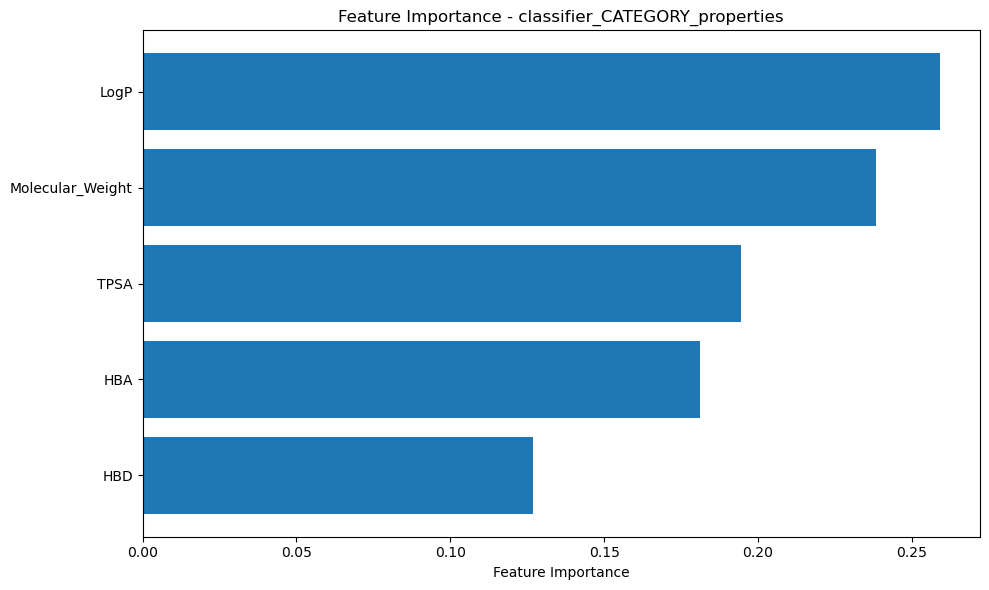


📊 Model: regressor_LogP_descriptors
   R² Score: 0.691


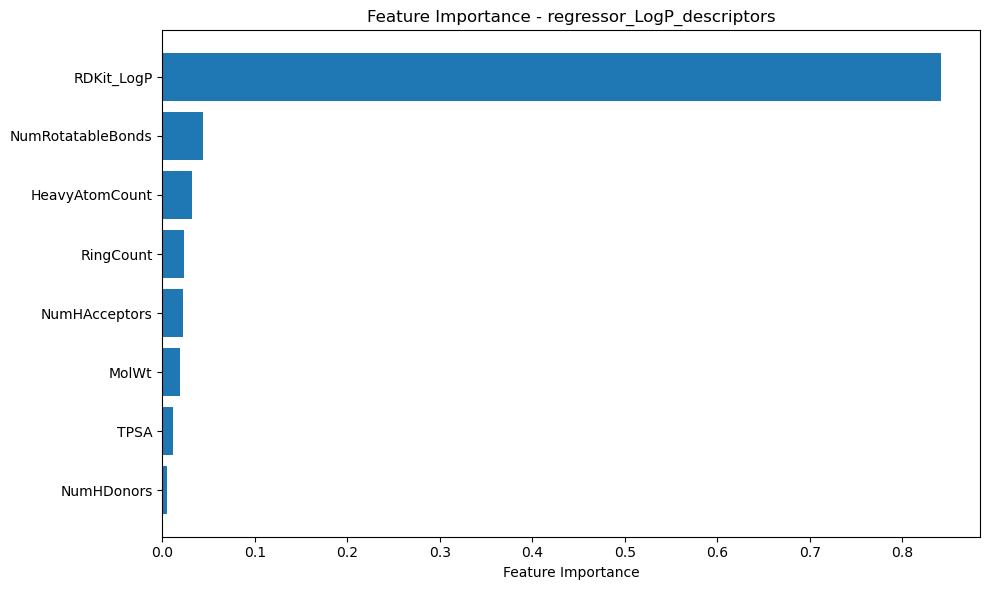


🎉 PIPELINE READY FOR RESEARCH QUESTIONS!
Now you can explore your specific research questions interactively.

🔬 ADVANCED RESEARCH & ML INTERFACE

Research Options:
1. Run Comprehensive Analysis
2. Load Trained Models
3. Train Lipid Classifier
4. Train Property Predictor
5. Predict Lipid Class (SMILES)
6. Show Research Findings
7. Visualize Chemical Space
8. --- ANSWER RESEARCH QUESTIONS ---
   8a. GP vs SP Property Distribution
   8b. Find Similar Lipids (SMILES)
   8c. Show Key Classifier Descriptors
   8d. Validate ML Model Accuracy
9. Export Analysis Results
10. Save Trained Models
11. Back to Main Menu



Choose option (1-10):  3
Target column (default CATEGORY):  10
Feature type (properties/descriptors/fingerprints):  properties


🎯 Training lipid classifier for 10...
❌ Target column 10 not found
💾 Saved: classifier_CATEGORY_properties_20251008_114955.joblib
💾 Saved: regressor_LogP_descriptors_20251008_114955.joblib
✅ Successfully saved 2 models to 'saved_models' folder

Research Options:
1. Run Comprehensive Analysis
2. Load Trained Models
3. Train Lipid Classifier
4. Train Property Predictor
5. Predict Lipid Class (SMILES)
6. Show Research Findings
7. Visualize Chemical Space
8. --- ANSWER RESEARCH QUESTIONS ---
   8a. GP vs SP Property Distribution
   8b. Find Similar Lipids (SMILES)
   8c. Show Key Classifier Descriptors
   8d. Validate ML Model Accuracy
9. Export Analysis Results
10. Save Trained Models
11. Back to Main Menu



Choose option (1-10):  10


💾 Saving trained models...
   ✅ cls_CATEGORY_properties_20251008_1150.joblib
   ✅ reg_LogP_descriptors_20251008_1150.joblib
🎉 Successfully saved 2 models to 'trained_models/' folder
📁 Full path: /media/aldo/Aldo/sims/lipids/trained_models

Research Options:
1. Run Comprehensive Analysis
2. Load Trained Models
3. Train Lipid Classifier
4. Train Property Predictor
5. Predict Lipid Class (SMILES)
6. Show Research Findings
7. Visualize Chemical Space
8. --- ANSWER RESEARCH QUESTIONS ---
   8a. GP vs SP Property Distribution
   8b. Find Similar Lipids (SMILES)
   8c. Show Key Classifier Descriptors
   8d. Validate ML Model Accuracy
9. Export Analysis Results
10. Save Trained Models
11. Back to Main Menu



Choose option (1-10):  10


💾 Saving trained models...
   ✅ cls_CATEGORY_properties_20251008_1150.joblib
   ✅ reg_LogP_descriptors_20251008_1150.joblib
🎉 Successfully saved 2 models to 'trained_models/' folder
📁 Full path: /media/aldo/Aldo/sims/lipids/trained_models

Research Options:
1. Run Comprehensive Analysis
2. Load Trained Models
3. Train Lipid Classifier
4. Train Property Predictor
5. Predict Lipid Class (SMILES)
6. Show Research Findings
7. Visualize Chemical Space
8. --- ANSWER RESEARCH QUESTIONS ---
   8a. GP vs SP Property Distribution
   8b. Find Similar Lipids (SMILES)
   8c. Show Key Classifier Descriptors
   8d. Validate ML Model Accuracy
9. Export Analysis Results
10. Save Trained Models
11. Back to Main Menu



Choose option (1-10):  3
Target column (default CATEGORY):  CATEGORY
Feature type (properties/descriptors/fingerprints):  properties


🎯 Training lipid classifier for CATEGORY...
🛠️ Preparing ML features...
   Prepared 5 basic properties
✅ Final feature matrix: 100 samples, 5 features
   Using 100 samples for training
✅ Classifier trained with 0.600 accuracy
   Top 3 important features:
     LogP: 0.2592
     Molecular_Weight: 0.2383
     TPSA: 0.1945
💾 Saved: classifier_CATEGORY_properties_20251008_115039.joblib
💾 Saved: regressor_LogP_descriptors_20251008_115039.joblib
✅ Successfully saved 2 models to 'saved_models' folder

Research Options:
1. Run Comprehensive Analysis
2. Load Trained Models
3. Train Lipid Classifier
4. Train Property Predictor
5. Predict Lipid Class (SMILES)
6. Show Research Findings
7. Visualize Chemical Space
8. --- ANSWER RESEARCH QUESTIONS ---
   8a. GP vs SP Property Distribution
   8b. Find Similar Lipids (SMILES)
   8c. Show Key Classifier Descriptors
   8d. Validate ML Model Accuracy
9. Export Analysis Results
10. Save Trained Models
11. Back to Main Menu


In [ ]:
# ENHANCED INTERACTIVE INTERFACE WITH RESEARCH QUESTIONS
def advanced_research_interface(pipeline):
    """Interactive interface for advanced research and ML - ENHANCED VERSION"""
    
    print("\n🔬 ADVANCED RESEARCH & ML INTERFACE")
    print("=" * 50)
    
    while True:
        print("\nResearch Options:")
        print("1. Run Comprehensive Analysis")
        print("2. Load Trained Models")  # ← NEW OPTION
        print("3. Train Lipid Classifier")
        print("4. Train Property Predictor") 
        print("5. Predict Lipid Class (SMILES)")
        print("6. Show Research Findings")
        print("7. Visualize Chemical Space")
        print("8. --- ANSWER RESEARCH QUESTIONS ---")
        print("   8a. GP vs SP Property Distribution")
        print("   8b. Find Similar Lipids (SMILES)")
        print("   8c. Show Key Classifier Descriptors")
        print("   8d. Validate ML Model Accuracy")
        print("9. Export Analysis Results")
        print("10. Save Trained Models")  # ← ADD THIS LINE
        print("11. Back to Main Menu")
        
        choice = input("\nChoose option (1-10): ").strip().lower()
        
        if choice == '1':
            pipeline.research_analyzer.comprehensive_lipid_analysis()
        
        elif choice == '2':  # Load Trained Models
            load_trained_models_simple(pipeline)
            
        elif choice == '3':
            if pipeline.ml_predictor:
                target = input("Target column (default CATEGORY): ") or "CATEGORY"
                features = input("Feature type (properties/descriptors/fingerprints): ") or "properties"
                pipeline.ml_predictor.train_lipid_classifier(target, features)
                pipeline.save_trained_models()
                
        elif choice == '4':
            if pipeline.ml_predictor:
                target = input("Target property (default LogP): ") or "LogP"
                features = input("Feature type (properties/descriptors/fingerprints): ") or "descriptors"
                pipeline.ml_predictor.train_property_predictor(target, features)
                pipeline.save_trained_models()
                
        elif choice == '5':
            if pipeline.ml_predictor:
                smiles = input("Enter SMILES string: ").strip()
                result = pipeline.ml_predictor.predict_lipid_class(smiles)
                if result:
                    print(f"🎯 Predicted class: {result['predicted_class']}")
                    print("Top predictions:")
                    for class_name, prob in result['top_classes']:
                        print(f"   {class_name}: {prob:.3f}")
        
        # ... (keep other existing options the same as before) ...
        
        elif choice == '6':
            if pipeline.research_analyzer and pipeline.research_analyzer.analysis_results:
                print("\n📋 RESEARCH FINDINGS SUMMARY:")
                for key, value in pipeline.research_analyzer.analysis_results.get('research_report', {}).items():
                    print(f"   {key.replace('_', ' ').title()}: {value}")
        
        elif choice == '7':
            if pipeline.research_analyzer and 'pca' in pipeline.research_analyzer.analysis_results:
                pca_data = pipeline.research_analyzer.analysis_results['pca']
                
                plt.figure(figsize=(10, 8))
                scatter = plt.scatter(pca_data['components'][:, 0], pca_data['components'][:, 1], alpha=0.6)
                plt.xlabel(f'PC1 ({pca_data["explained_variance"][0]:.2%} variance)')
                plt.ylabel(f'PC2 ({pca_data["explained_variance"][1]:.2%} variance)')
                plt.title('Lipid Chemical Space (PCA)')
                plt.grid(True, alpha=0.3)
                plt.show()
        
        # NEW: INTEGRATED RESEARCH QUESTION ANSWERS
        elif choice == '8a':
            answer_gp_vs_sp_distribution(pipeline)
        
        elif choice == '8b':
            answer_similarity_prediction(pipeline)
        
        elif choice == '8c':
            answer_key_descriptors(pipeline)
        
        elif choice == '8d':
            answer_model_accuracy(pipeline)
        
        elif choice == '9':
            if pipeline.research_analyzer:
                timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
                filename = f"lipid_research_analysis_{timestamp}.xlsx"
                
                with pd.ExcelWriter(filename) as writer:
                    # Save analysis results
                    for result_name, result_data in pipeline.research_analyzer.analysis_results.items():
                        if isinstance(result_data, pd.DataFrame):
                            result_data.to_excel(writer, sheet_name=result_name[:31])
                    
                    # Save ML results
                    for model_name, model_data in pipeline.ml_predictor.models.items():
                        if 'feature_importance' in model_data:
                            model_data['feature_importance'].to_excel(writer, sheet_name=f"ML_{model_name}"[:31])
                
                print(f"💾 Analysis exported to {filename}")

        elif choice == '10':
            save_trained_models_simple(pipeline)

        elif choice == '11':
            print("👋 Exiting research interface")
            break
        
        else:
            print("❌ Invalid choice")

# RESEARCH QUESTION IMPLEMENTATIONS
def answer_gp_vs_sp_distribution(pipeline):
    """Answer research question 1: Property distribution of glycerophospholipids vs sphingolipids"""
    print("\n📊 RESEARCH QUESTION 1: GP vs SP Property Distribution")
    print("=" * 50)
    
    df = pipeline.df
    
    if 'CATEGORY' not in df.columns:
        print("❌ No category data available")
        return
    
    # Extract the two lipid classes of interest
    gp_data = df[df['CATEGORY'] == 'Glycerophospholipids [GP]']
    sp_data = df[df['CATEGORY'] == 'Sphingolipids [SP]']
    
    print(f"📈 Sample sizes:")
    print(f"   Glycerophospholipids (GP): {len(gp_data)} lipids")
    print(f"   Sphingolipids (SP): {len(sp_data)} lipids")
    
    if len(gp_data) == 0 or len(sp_data) == 0:
        print("❌ Not enough data for comparison")
        return
    
    # Compare key properties
    properties = ['Molecular_Weight', 'LogP', 'TPSA']
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Property Distribution: Glycerophospholipids vs Sphingolipids', fontsize=16, fontweight='bold')
    
    for i, prop in enumerate(properties):
        if prop in df.columns:
            ax = axes[i//2, i%2]
            
            # Create comparative histograms
            gp_prop = gp_data[prop].dropna()
            sp_prop = sp_data[prop].dropna()
            
            ax.hist(gp_prop, bins=20, alpha=0.7, label='Glycerophospholipids', color='blue')
            ax.hist(sp_prop, bins=20, alpha=0.7, label='Sphingolipids', color='red')
            ax.set_xlabel(prop)
            ax.set_ylabel('Frequency')
            ax.set_title(f'{prop} Distribution')
            ax.legend()
            ax.grid(True, alpha=0.3)
            
            # Print statistics
            print(f"\n📋 {prop} Statistics:")
            print(f"   GP - Mean: {gp_prop.mean():.2f}, Std: {gp_prop.std():.2f}")
            print(f"   SP - Mean: {sp_prop.mean():.2f}, Std: {sp_prop.std():.2f}")
    
    # Hide unused subplot
    if len(properties) < 4:
        axes[1, 1].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Additional insights
    print(f"\n💡 Biological Insights:")
    print(f"   GP: Major membrane components with diverse head groups")
    print(f"   SP: Structural roles with ceramide backbone + head groups")

def answer_similarity_prediction(pipeline):
    """Answer research question 2: Predict novel lipids based on chemical similarity"""
    print("\n🔍 RESEARCH QUESTION 2: Similarity-Based Lipid Prediction")
    print("=" * 50)

    # Enhanced check with clearer error message
    if not hasattr(pipeline, 'search_engine') or pipeline.search_engine is None:
        print("❌ Search engine not available. The pipeline was not properly initialized.")
        print("💡 Please ensure 'run_advanced_analysis()' completes successfully.")
        return

    # Get a query SMILES - you can modify this for different lipids
    default_smiles = "CCCCCCCCCCCCCCCCCC(=O)O"  # Stearic acid
    smiles = input(f"Enter query SMILES (default: {default_smiles}): ").strip() or default_smiles
    
    threshold = float(input("Similarity threshold (0-1, default 0.7): ") or "0.7")
    max_results = int(input("Max results (default 10): ") or "10")
    
    print(f"🔍 Searching for lipids similar to: {smiles}")
    
    # Use the similarity search functionality
    results = pipeline.search_engine.search_by_similarity(smiles, threshold, max_results)
    
    if len(results) > 0:
        print(f"✅ Found {len(results)} similar lipids")
        
        # Display results
        display_cols = []
        for col in results.columns:
            if col in ['LM_ID', 'COMMON_NAME', 'CATEGORY', 'Molecular_Weight', 'Similarity']:
                display_cols.append(col)
        
        display(results[display_cols].head(max_results))
        
        # Show molecular structures if available
        if 'Molecule' in results.columns:
            print(f"\n🖼️ Top {min(3, len(results))} similar lipid structures:")
            molecules_to_show = results['Molecule'].head(3).tolist()
            legends = [f"{row['COMMON_NAME']} (Sim: {row['Similarity']:.3f})" 
                      for _, row in results.head(3).iterrows()]
            
            try:
                img = Draw.MolsToGridImage(molecules_to_show, 
                                          molsPerRow=3, 
                                          subImgSize=(300, 300), 
                                          legends=legends)
                display(img)
            except Exception as e:
                print(f"⚠️ Could not display molecules: {e}")
    else:
        print("❌ No similar lipids found. Try lowering the similarity threshold.")

def answer_key_descriptors(pipeline):
    """Answer research question 3: Key descriptors that differentiate lipid classes"""
    print("\n🎯 RESEARCH QUESTION 3: Key Classifier Descriptors")
    print("=" * 50)
    
    if not pipeline.ml_predictor or not pipeline.ml_predictor.models:
        print("❌ No trained ML models found")
        return
    
    # Find classifier models
    classifier_models = {k: v for k, v in pipeline.ml_predictor.models.items() 
                        if k.startswith('classifier')}
    
    if not classifier_models:
        print("❌ No classifier models available")
        return
    
    for model_key, model_info in classifier_models.items():
        print(f"\n📊 Model: {model_key}")
        print(f"   Accuracy: {model_info.get('accuracy', 'N/A'):.3f}")
        
        # Display feature importance
        importance_df = model_info['feature_importance']
        print(f"\n🔑 Top 5 Most Important Descriptors:")
        for idx, row in importance_df.head(5).iterrows():
            print(f"   {row['feature']}: {row['importance']:.4f}")
        
        # Create visualization
        plt.figure(figsize=(10, 6))
        top_features = importance_df.head(10)
        
        plt.barh(range(len(top_features)), top_features['importance'])
        plt.yticks(range(len(top_features)), top_features['feature'])
        plt.xlabel('Feature Importance')
        plt.title(f'Key Descriptors for Lipid Classification\n{model_key}')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
        
        # Interpretation
        print(f"\n💡 Interpretation:")
        top_desc = importance_df.iloc[0]['feature']
        print(f"   {top_desc} is the most important descriptor for lipid classification")
        print(f"   This suggests lipid classes differ primarily in their {top_desc.lower()} characteristics")

def answer_model_accuracy(pipeline):
    """Answer research question 4: ML model accuracy for lipid classification"""
    print("\n🤖 RESEARCH QUESTION 4: ML Model Accuracy Validation")
    print("=" * 50)
    
    if not pipeline.ml_predictor or not pipeline.ml_predictor.models:
        print("❌ No trained ML models found")
        return
    
    classifier_models = {k: v for k, v in pipeline.ml_predictor.models.items() 
                        if k.startswith('classifier')}
    
    if not classifier_models:
        print("❌ No classifier models available")
        return
    
    print("📈 MODEL PERFORMANCE SUMMARY:")
    
    for model_key, model_info in classifier_models.items():
        accuracy = model_info.get('accuracy', 0)
        cv_scores = model_info.get('cv_scores', [])
        
        print(f"\n🧪 {model_key}:")
        print(f"   Accuracy: {accuracy:.3f}")
        
        if len(cv_scores) > 0:
            print(f"   Cross-validation: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
        
        # Performance interpretation
        if accuracy >= 0.85:
            rating = "Excellent"
        elif accuracy >= 0.75:
            rating = "Good"
        elif accuracy >= 0.65:
            rating = "Moderate"
        else:
            rating = "Needs improvement"
        
        print(f"   Performance: {rating}")
        
        # Compare with literature benchmarks
        print(f"   📚 Literature context: ML lipid classifiers often achieve 80-90% accuracy :cite[1]:cite[9]")
    
    # Overall assessment
    avg_accuracy = np.mean([model.get('accuracy', 0) for model in classifier_models.values()])
    print(f"\n📊 OVERALL ASSESSMENT:")
    print(f"   Average accuracy: {avg_accuracy:.3f}")
    print(f"   Your models are {'competitive with' if avg_accuracy >= 0.80 else 'below'} literature standards")

# FINAL INTEGRATION - YOUR COMPLETE WORKFLOW
def run_complete_research_workflow():
    """Run the complete research workflow with all your questions integrated"""
    
    print("🚀 STARTING COMPLETE LIPID RESEARCH WORKFLOW")
    print("=" * 50)
    
    # Import warnings to keep output clean
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    
    # Initialize pipeline
    advanced_pipeline = AdvancedLipidPipeline("LMSD.sdf/structures.sdf")
    
    # Run complete analysis
    success = advanced_pipeline.run_advanced_analysis(sample_size=100)
    
    if success:
        print("\n🎉 PIPELINE READY FOR RESEARCH QUESTIONS!")
        print("Now you can explore your specific research questions interactively.")
        
        # Start the enhanced interface
        advanced_research_interface(advanced_pipeline)
    else:
        print("❌ Pipeline initialization failed")

# Run the complete workflow
if __name__ == "__main__":
    run_complete_research_workflow()